In [8]:
import numpy
import scipy
import pandas
import PIL
from PIL import Image
import os

pwd = os.getcwd()

print(pwd)

/home/mauasus/ml_projects


In [5]:
import sys

modulename = 'PIL'
if modulename not in sys.modules:
    print ('You have not imported the {} module'.format(modulename))

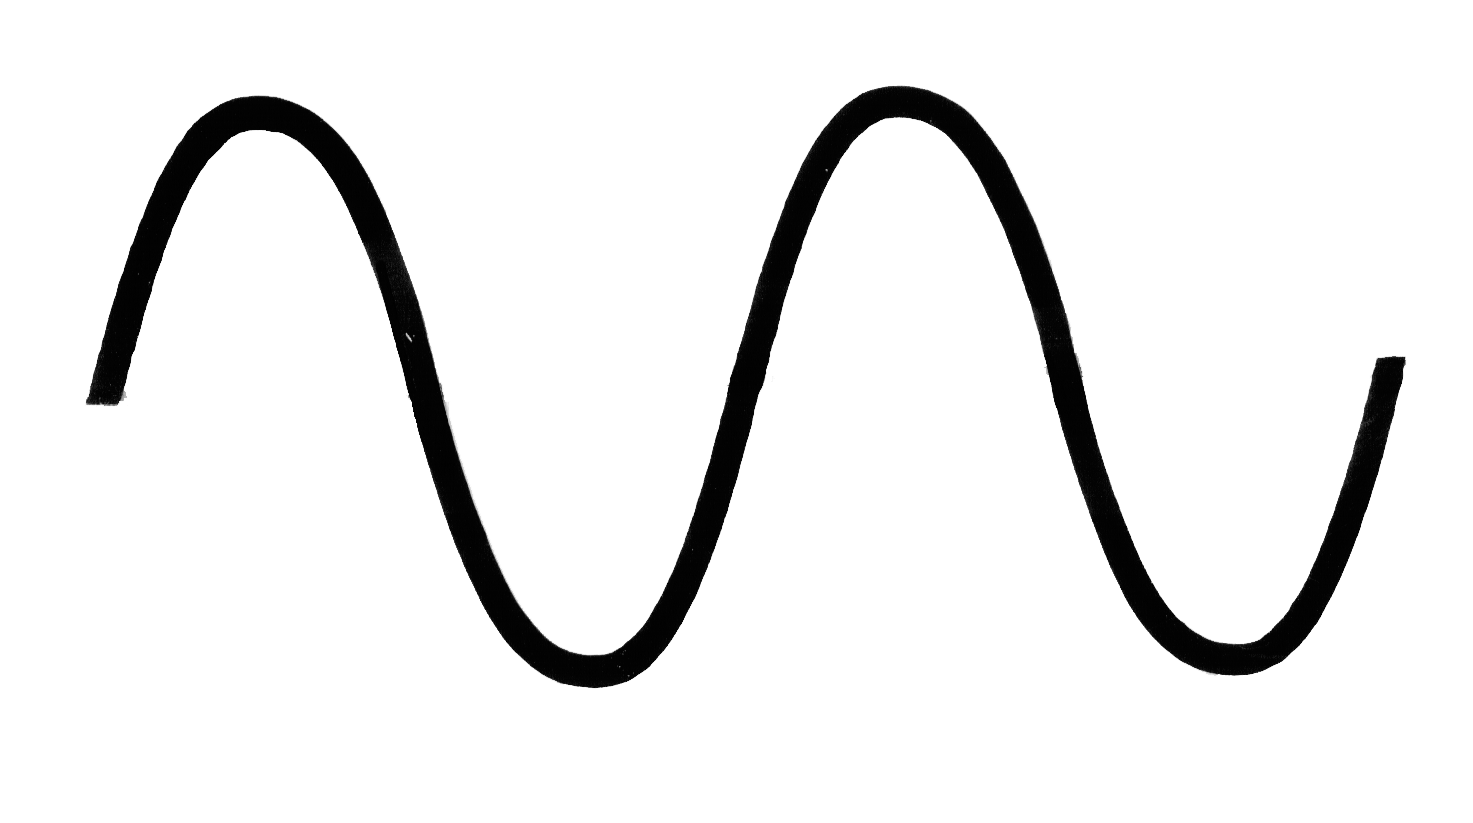

'/home/mauasus/ml_projects/sinewave.png'

In [11]:
z='/home/mauasus/ml_projects/sinewave.png'
bwimg = PIL.Image.open(z).convert('L')

display(bwimg)

In [15]:
bwimg_array=numpy.asarray(bwimg)
a = numpy.array(bwimg_array)
print(a.shape)

(823, 1473)


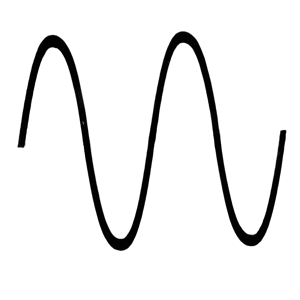

(300, 300)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [23]:
bwimg_resized = bwimg.resize((300,300))
bwimg_re_array = numpy.asarray(bwimg_resized)
display(bwimg_resized)
print(bwimg_re_array.shape)
print(bwimg_re_array)

In [22]:
sample_step = numpy.linspace(1,300,100,dtype=int)
print(sample_step)

[  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
  55  58  61  64  67  70  73  76  79  82  85  88  91  94  97 100 103 106
 109 112 115 118 121 124 127 130 133 136 139 142 145 148 152 155 158 161
 164 167 170 173 176 179 182 185 188 191 194 197 200 203 206 209 212 215
 218 221 224 227 230 233 236 239 242 245 248 251 254 257 260 263 266 269
 272 275 278 281 284 287 290 293 296 300]
